# Twitter„Åã„ÇâWordCloud‰ΩúÊàê  
[„Åì„Åì](https://qiita.com/kenmatsu4/items/9b6ac74f831443d29074)„ÇíÂèÇËÄÉ„Å´‰Ωú„Çã
## Ê∫ñÂÇô  
[„Åì„Åì](https://qiita.com/grachro/items/4fbc9bf8174c5abb7bdd)„ÇíÂèÇËÄÉ„Å´MeCab„ÅÆ„Ç§„É≥„Çπ„Éà„Éº„É´  
## Word Cloud„ÅÆ‰ΩúÊàê
„É©„Ç§„Éñ„É©„É™„Çí„Ç§„É≥„Éù„Éº„Éà„Åô„Çã

In [11]:
# „É©„Ç§„Éñ„É©„É™„ÅÆ„Ç§„É≥„Éù„Éº„Éà
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from bs4 import BeautifulSoup
import requests
import MeCab as mc
import json

# „ÉÑ„Ç§„ÉÉ„Çø„Éº„ÅÆ„ÉØ„Éº„Éâ„ÇØ„É©„Ç¶„Éâ

## „ÉÑ„Ç§„Éº„ÉàÊÉÖÂ†±„ÇíÂèñÂæó„Åô„Çã

In [3]:
from twython import TwythonStreamer
import json

tweets = []

class MyStreamer(TwythonStreamer):
    
    def on_success(self, data):
        
        if data['lang']=='ja':
            tweets.append(data)
            if len(tweets)%10==0:
                print("received tweet #", len(tweets))
            
            if len(tweets) >= 1000:
                self.disconnect()
    
    def on_error(self, status_code, data):
        print(status_code, data)
        self.disconnect()

In [4]:
with open('../credentials.json', 'rt') as f:
    credentials =json.load(f)
    CONSUMER_KEY = credentials["Consumer Key"]
    CONSUMER_SECRET = credentials["Consumer Secret"]
    ACCESS_TOKEN = credentials["Access Token"]
    ACCESS_TOKEN_SECRET = credentials["Access Token Secret"]

stream = MyStreamer(CONSUMER_KEY, CONSUMER_SECRET, ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

 #fujiTV„ÅÆ„Éè„ÉÉ„Ç∑„É•„Çø„Ç∞„ÅßÈÅéÂéª1000„Éá„Éº„Çø„ÇíÂèñÂæó„Åó„Å¶„Åø„Çã

In [5]:
stream.statuses.filter(track='#fujitv')

received tweet # 10
received tweet # 20
received tweet # 30
received tweet # 40
received tweet # 50
received tweet # 60
received tweet # 70
received tweet # 80
received tweet # 90
received tweet # 100
received tweet # 110
received tweet # 120
received tweet # 130
received tweet # 140
received tweet # 150
received tweet # 160
received tweet # 170
received tweet # 180
received tweet # 190
received tweet # 200
received tweet # 210
received tweet # 220
received tweet # 230
received tweet # 240
received tweet # 250
received tweet # 260
received tweet # 270
received tweet # 280
received tweet # 290
received tweet # 300
received tweet # 310
received tweet # 320
received tweet # 330
received tweet # 340
received tweet # 350
received tweet # 360
received tweet # 370
received tweet # 380
received tweet # 390
received tweet # 400
received tweet # 410
received tweet # 420
received tweet # 430
received tweet # 440
received tweet # 450
received tweet # 460
received tweet # 470
received tweet # 480
r

In [258]:
#„ÄÄ„Éá„Éº„Çø„Çí‰øùÂ≠ò
import json
tweet_jsons = []

for tweet in tweets:
    tweet_json = {
            "id": tweet["id"],
            "name": tweet["user"]["name"],
            "screen_name": tweet["user"]["screen_name"],
            "text": tweet["text"],
            "created_at": tweet["created_at"],
            "retweeted_status": "retweeted_status" in tweet
    }
    tweet_jsons.append(tweet_json)
with open("tweet_data_fujitv.txt", "wt") as fout:
    json.dump(tweet_jsons, fout, ensure_ascii=False, indent=2, sort_keys=True)

In [1]:
from collections import Counter

top_hashtags = Counter(hashtag['text'].lower() 
                    for tweet in tweets
                    for hashtag in tweet["entities"]["hashtags"])

print(top_hashtags.most_common(5))

NameError: name 'tweets' is not defined

## „ÉØ„Éº„Éâ„ÇØ„É©„Ç¶„ÉâÁîüÊàê

In [8]:
def mecab_analysis_tweet(text):
    t = mc.Tagger('-Ochasen')
    enc_text = text 
    node = t.parseToNode(enc_text) 
    output = []
    while(node):
        if node.surface != "":  # „Éò„ÉÉ„ÉÄ„Å®„Éï„ÉÉ„Çø„ÇíÈô§Â§ñ
            word_type = node.feature.split(",")[0]
            if word_type in ["ÂêçË©û"]:
                output.append(node.surface)
        node = node.next
        if node is None:
            break
    return output

In [20]:
def create_wordcloud_tweet(text):

    # Áí∞Â¢É„Å´Âêà„Çè„Åõ„Å¶„Éï„Ç©„É≥„Éà„ÅÆ„Éë„Çπ„ÇíÊåáÂÆö„Åô„Çã„ÄÇ
    #fpath = "/System/Library/Fonts/HelveticaNeue-UltraLight.otf"
    fpath = "/System/Library/Fonts/„Éí„É©„Ç≠„Çô„ÉéËßí„Ç≥„Çô„Ç∑„ÉÉ„ÇØ W3.ttc"

    # „Çπ„Éà„ÉÉ„Éó„ÉØ„Éº„Éâ„ÅÆË®≠ÂÆö
    stop_words = [ '„Å¶„Çã', '„ÅÑ„Çã', '„Å™„Çã', '„Çå„Çã', '„Åô„Çã', '„ÅÇ„Çã', '„Åì„Å®', '„Åì„Çå', '„Åï„Çì', '„Åó„Å¶', \
             '„Åè„Çå„Çã', '„ÇÑ„Çã', '„Åè„Å†„Åï„Çã', '„Åù„ÅÜ', '„Åõ„Çã', '„Åó„Åü', 'ÊÄù„ÅÜ',  \
             '„Åù„Çå', '„Åì„Åì', '„Å°„ÇÉ„Çì', '„Åè„Çì', '', '„Å¶','„Å´','„Çí','„ÅØ','„ÅÆ', '„Åå', '„Å®', '„Åü', '„Åó', '„Åß', \
             '„Å™„ÅÑ', '„ÇÇ', '„Å™', '„ÅÑ', '„Åã', '„ÅÆ„Åß', '„Çà„ÅÜ', '„ÇÇ„ÅÆ', '„Åü„ÇÅ','„Å™„Åã„Å£','fujitv', 'RT','https', 'co','']

    wordcloud = WordCloud(background_color="white",font_path=fpath, width=900, height=500, \
                          stopwords=set(stop_words)).generate(text)

    plt.figure(figsize=(15,12))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [12]:
# ‰øùÂ≠ò„Åó„Åü„Éá„Éº„Çø„Çí„É≠„Éº„Éâ
with open("tweet_data_fujitv.txt", "r") as fin:
    tweet_loaded=json.load(fin)

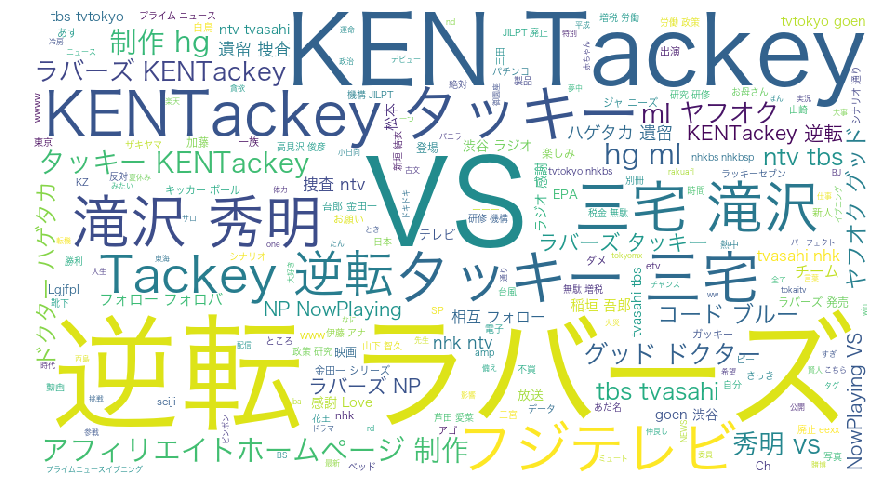

In [21]:
wordlist=[]

for tweet in tweet_loaded:
    if tweet['retweeted_status'] :
        continue
    if '„Ç≠„É£„É≥„Éö„Éº„É≥' in tweet["text"]: #Êá∏Ë≥û„Å™„Å©„ÅßËá™ÂãïÁîüÊàê„Åï„Çå„Åü„ÉÑ„Ç§„Éº„Éà„ÅåÂ§ö„ÅÑ„ÅÆ„ÅßÈô§Â§ñ
        continue
    if 'ÂΩì„Åü„Çã' in tweet["text"]: #Êá∏Ë≥û„Å™„Å©„ÅßËá™ÂãïÁîüÊàê„Åï„Çå„Åü„ÉÑ„Ç§„Éº„Éà„ÅåÂ§ö„ÅÑ„ÅÆ„ÅßÈô§Â§ñ
        continue
    wordlist += mecab_analysis_tweet(tweet['text'])

create_wordcloud_tweet(" ".join(wordlist))

In [24]:
for tweet in tweet_loaded:
    if 'ÈÄÜËª¢' in tweet['text']:
        print(tweet['name'])
        print(tweet['text'])
        print("-----")

yumi
VSÂµêÂßã„Åæ„Çä„Åæ„Åó„Åü„Åå„ÄÅKEN‚òÜTackey „ÅÆÁôªÂ†¥„ÅØ„ÄÅ„Åæ„Å†„Åß„Åô„Åã‚ùì
KEN‚òÜTackey / „ÄåÈÄÜËª¢„É©„Éê„Éº„Ç∫„Äç
#ÂÅ•„Çø„ÉÉ„Ç≠„Éº #KENTackey #ÈÄÜËª¢„É©„Éê„Éº„Ç∫  #NP #NowPlaying  #VSÂµê #fujitv
-----
„Åõ„ÅÑ„Åõ„ÅÑ„Åô„Çã„Åª„Å©„ÄÅKEN‚òÜTackeyLOVE‚ù§
„äóÔ∏è¬†KEN‚òÜTackey¬†üéâ
#ÈÄÜËª¢„É©„Éê„Éº„Ç∫¬†Áô∫Â£≤‰∏≠

„ÅÇ„Çå‚ÅâÔ∏è
„Éó„É©„Çπ„ÉØ„É≥„Å£„Å¶„Å©„ÅÆ„Çø„Ç§„Éü„É≥„Ç∞„ÅßÁôªÂ†¥Ôºü

https://t.co/m613Lgjfpl

#fujitv
#VSÂµê
#ÂÅ•„Çø„ÉÉ„Ç≠„Éº
#KENTackey
#NP
-----
mokuren329
vsÂµê„Å´„Éó„É©„Çπ„ÉØ„É≥„ÅßÂèÇÊà¶ÔºÅ
„Ç≠„É£„Äú‚ô™‚îÄ‚îÄ‚îÄÔºØÔºà‚âß‚àá‚â¶ÔºâÔºØ‚îÄ‚îÄ‚îÄ‚îÄ‚ô™ÂÅ•„Çø„ÉÉ„Ç≠„ÉºÊù•„Çã„Äú
#ÈÄÜËª¢„É©„Éê„Éº„Ç∫  #KENTackey #ÂÅ•„Çø„ÉÉ„Ç≠„Éº #‰∏âÂÆÖÂÅ• #ÊªùÊ≤¢ÁßÄÊòé   
#vsÂµê #fujitv
-----
yumi
„ÅÑ„Çà„ÅÑ„ÇàKEN‚òÜTackey „ÅÆÁôªÂ†¥„Åß„Åô„Çàüíï
KEN‚òÜTackey / „ÄåÈÄÜËª¢„É©„Éê„Éº„Ç∫„Äç
#ÂÅ•„Çø„ÉÉ„Ç≠„Éº #KENTackey #ÈÄÜËª¢„É©„Éê„Éº„Ç∫  #NP #NowPlaying  #VSÂµê #fujitv
-----
mokuren329
„Éã„Éé„ÅÇ„Çä„Åå„Å®„ÅÜÔºÅ
ÂÅ•„Çø„ÉÉ„Ç≠„Éº„ÇíÂëº„Çì„Åß„Åè„Çå„Å¶ÔºÅ
#ÈÄÜËª¢„É©„Éê„Éº„Ç∫  #KENTackey #ÂÅ•„Çø„ÉÉ„Ç≠„Éº #‰∏âÂÆÖ

# ÁµêÊûú
ÊúÄÊñ∞1000„ÉÑ„Ç§„Éº„ÉàÂÜÖ„ÅÆ#fujitv„ÉÑ„Ç§„Éº„Éà„ÇíË™ø„Åπ„Çã„Å®„ÄÅ„ÄåVSÂµê„Äç„ÅÆ„ÄåKEN‚òÜTackey„Äç„Å®Êñ∞Êõ≤„ÅÆ„ÄåÈÄÜËª¢„É©„Éê„Éº„Ç∫„Äç„Åå‰∫∫Ê∞ó„Åß„ÅÇ„Çã„Åì„Å®„ÅåÂàÜ„Åã„Å£„Åü
